<a href="https://colab.research.google.com/github/dimitarpg13/rag_architectures_and_concepts/blob/main/src/examples/ann/comparisons/knn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Implementation

This notebook provides a comprehensive implementation of the k-Nearest Neighbors algorithm, including:
- Custom implementation from scratch
- Comparison with scikit-learn
- Different distance metrics
- Visualization of decision boundaries
- Performance analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification, load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. KNN Implementation from Scratch

The k-Nearest Neighbors algorithm works by:
1. Computing distances between the query point and all training samples
2. Finding the k nearest neighbors
3. Making predictions based on majority vote (classification) or average (regression)

In [2]:
class KNNClassifier:
    """
    K-Nearest Neighbors Classifier implementation from scratch.

    Parameters:
    -----------
    k : int, default=3
        Number of neighbors to consider
    distance_metric : str, default='euclidean'
        Distance metric to use ('euclidean', 'manhattan', 'cosine')
    """

    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store training data (lazy learning - no actual training happens).

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def _compute_distance(self, x1, x2):
        """
        Compute distance between two points based on the specified metric.

        Parameters:
        -----------
        x1, x2 : array-like
            Points to compute distance between

        Returns:
        --------
        float : distance value
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance_metric == 'cosine':
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")

    def _predict_single(self, x):
        """
        Predict class for a single sample.

        Parameters:
        -----------
        x : array-like, shape (n_features,)
            Sample to predict

        Returns:
        --------
        Predicted class label
        """
        # Compute distances to all training samples
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]

        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get labels of k nearest neighbors
        k_nearest_labels = self.y_train[k_indices]

        # Return most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Samples to predict

        Returns:
        --------
        array : Predicted class labels
        """
        return np.array([self._predict_single(x) for x in X])

    def predict_proba(self, X):
        """
        Predict class probabilities for samples in X.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Samples to predict

        Returns:
        --------
        array : Class probabilities
        """
        probas = []
        classes = np.unique(self.y_train)

        for x in X:
            distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            # Calculate probability for each class
            proba = np.array([np.sum(k_nearest_labels == c) / self.k for c in classes])
            probas.append(proba)

        return np.array(probas)

## 2. Testing with Synthetic Data

Let's create a simple dataset and test our implementation.

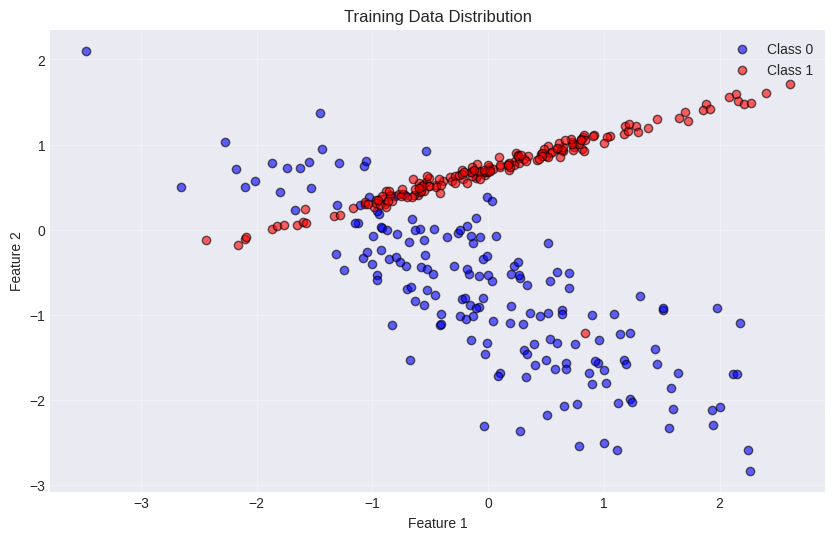

In [5]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1],
            c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1],
            c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Train and Evaluate Custom KNN

In [6]:
# Train our custom KNN
knn_custom = KNNClassifier(k=5, distance_metric='euclidean')
knn_custom.fit(X_train_scaled, y_train)

# Make predictions
start_time = time.time()
y_pred_custom = knn_custom.predict(X_test_scaled)
custom_time = time.time() - start_time

# Evaluate
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom KNN Accuracy: {accuracy_custom:.4f}")
print(f"Prediction Time: {custom_time:.4f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

Custom KNN Accuracy: 0.9467
Prediction Time: 0.4072 seconds

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        75
           1       0.90      1.00      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



## 4. Comparison with Scikit-learn

In [7]:
# Train scikit-learn KNN
knn_sklearn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_sklearn.fit(X_train_scaled, y_train)

# Make predictions
start_time = time.time()
y_pred_sklearn = knn_sklearn.predict(X_test_scaled)
sklearn_time = time.time() - start_time

# Evaluate
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn KNN Accuracy: {accuracy_sklearn:.4f}")
print(f"Prediction Time: {sklearn_time:.4f} seconds")
print(f"\nSpeedup: {custom_time / sklearn_time:.2f}x faster with scikit-learn")

Scikit-learn KNN Accuracy: 0.9467
Prediction Time: 0.0031 seconds

Speedup: 130.02x faster with scikit-learn


## 5. Visualize Decision Boundaries

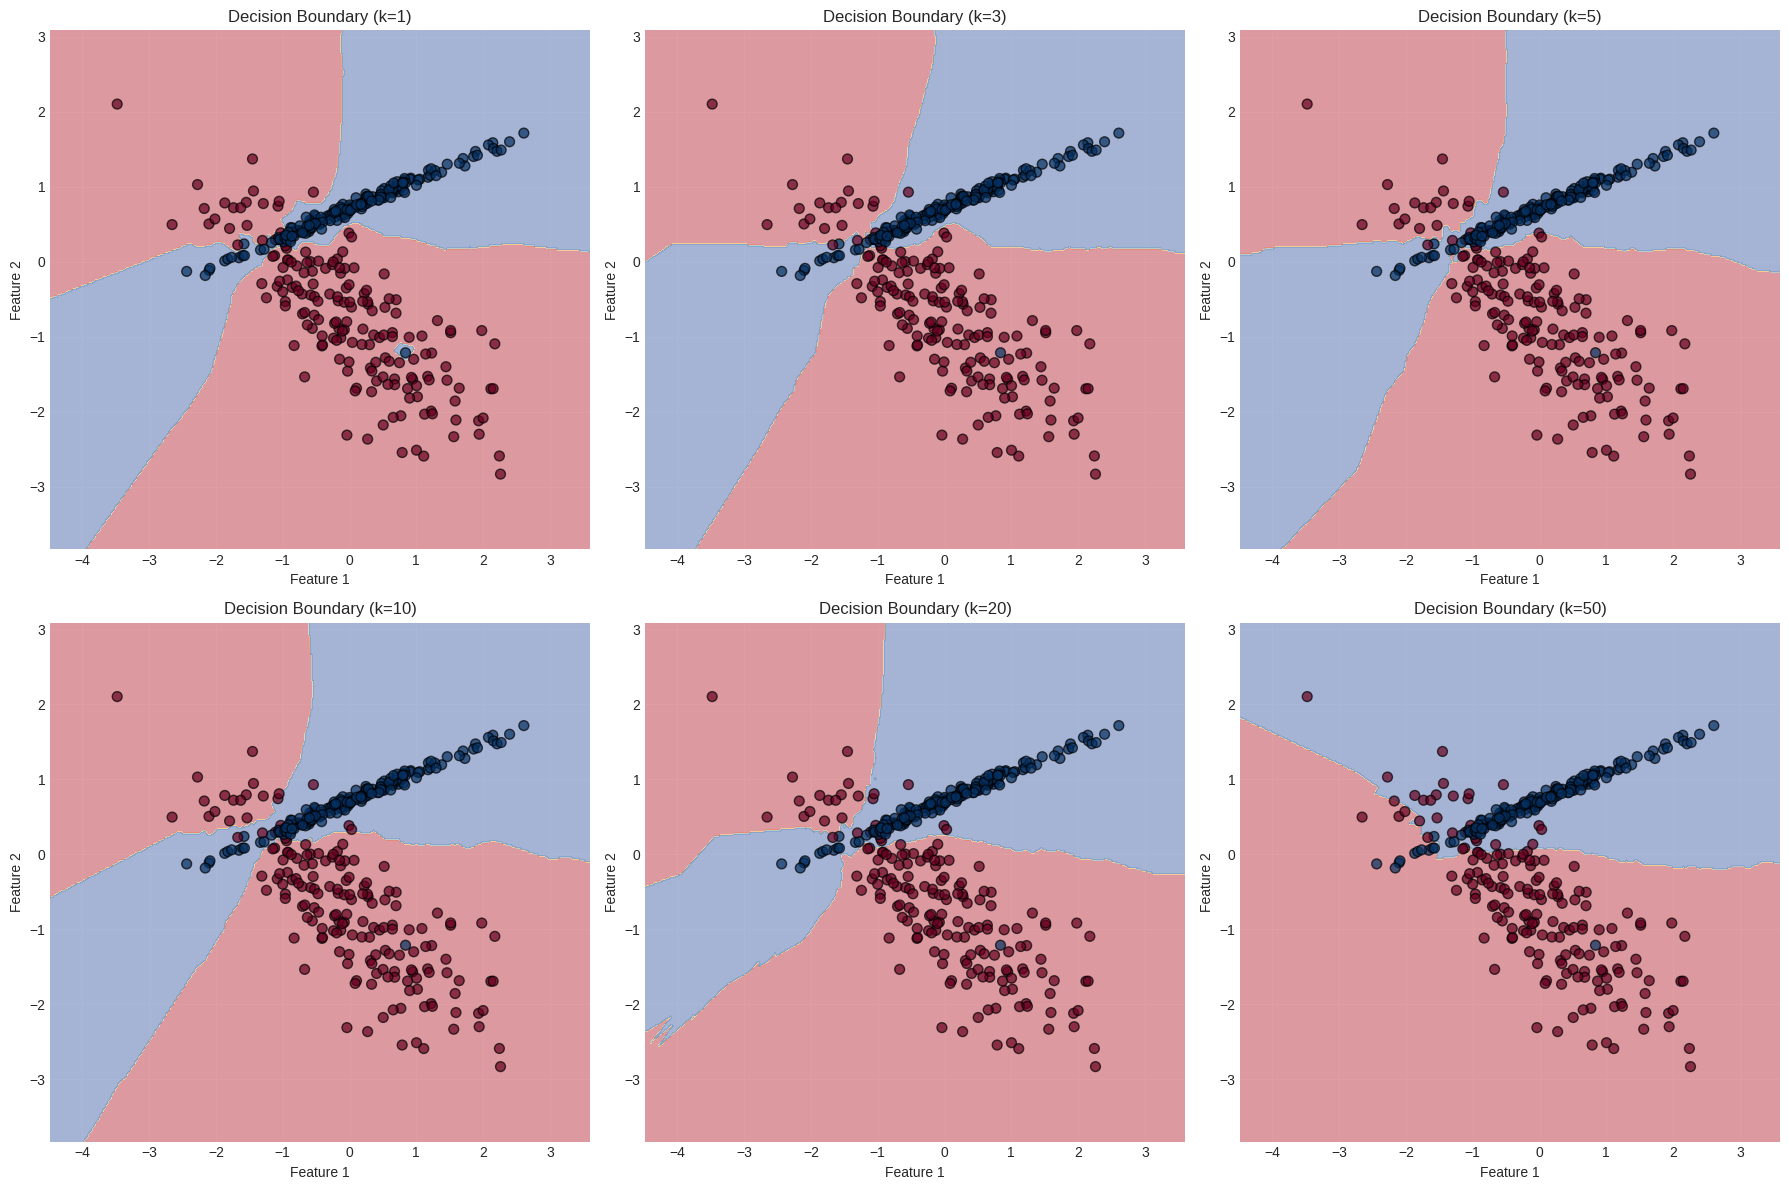

In [8]:
def plot_decision_boundary(X, y, classifier, title, ax=None):
    """
    Plot decision boundary for a 2D classifier.
    """
    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.RdYlBu
    cmap_bold = plt.cm.RdBu

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
               edgecolor='k', s=50, alpha=0.7)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    return ax

# Plot decision boundaries for different k values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
k_values = [1, 3, 5, 10, 20, 50]

for idx, k in enumerate(k_values):
    ax = axes[idx // 3, idx % 3]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    plot_decision_boundary(X_train_scaled, y_train, knn,
                          f'Decision Boundary (k={k})', ax=ax)

plt.tight_layout()
plt.show()

## 6. Effect of Different Distance Metrics

Euclidean Distance - Accuracy: 0.9467
Manhattan Distance - Accuracy: 0.9400
Cosine Distance - Accuracy: 0.8533


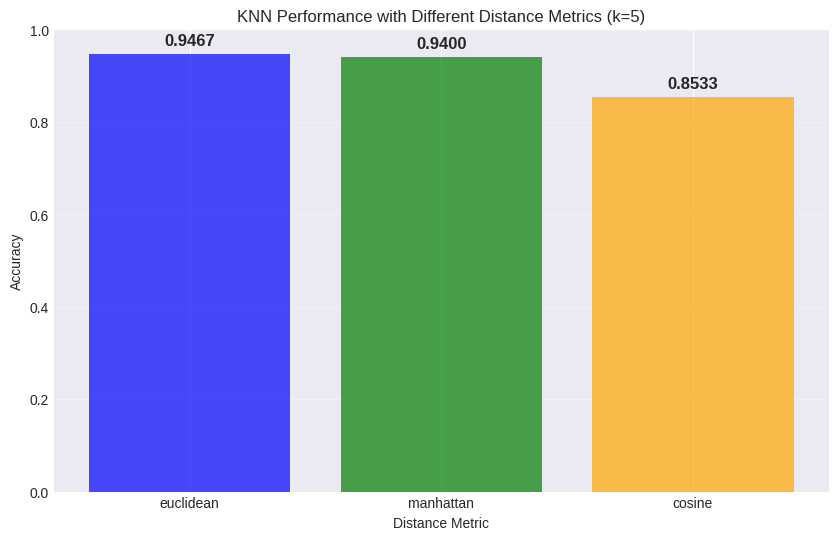

In [9]:
# Compare different distance metrics
metrics = ['euclidean', 'manhattan', 'cosine']
results = {}

for metric in metrics:
    knn = KNNClassifier(k=5, distance_metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy
    print(f"{metric.capitalize()} Distance - Accuracy: {accuracy:.4f}")

# Visualize comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'], alpha=0.7)
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different Distance Metrics (k=5)')
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')
for i, (metric, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12, fontweight='bold')
plt.show()

## 7. Finding Optimal k Value

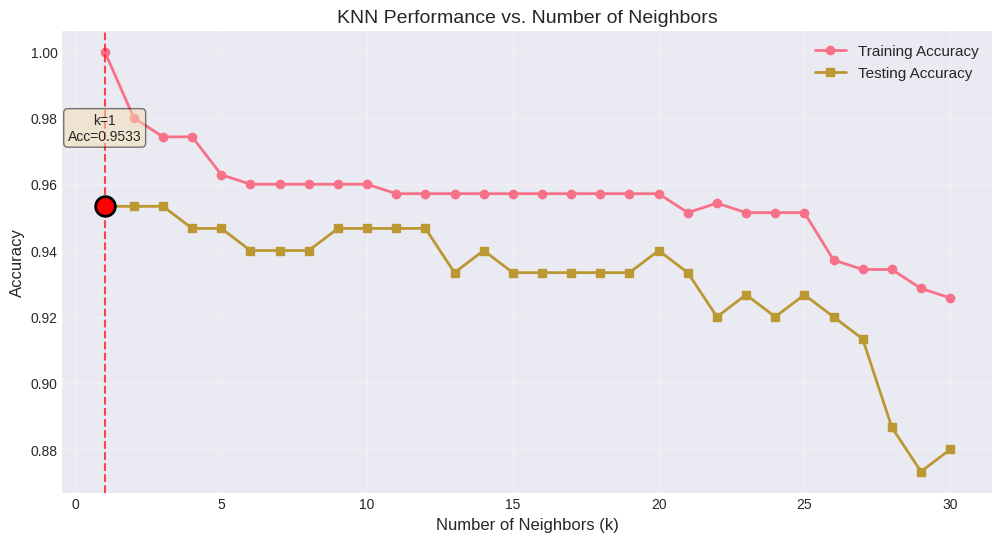

Optimal k: 1
Best Test Accuracy: 0.9533


In [10]:
# Test different k values
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o', linewidth=2)
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='s', linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Performance vs. Number of Neighbors', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Find and mark optimal k
optimal_k = k_range[np.argmax(test_scores)]
optimal_accuracy = max(test_scores)
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
plt.scatter([optimal_k], [optimal_accuracy], color='red', s=200, zorder=5,
            edgecolors='black', linewidth=2)
plt.text(optimal_k, optimal_accuracy + 0.02, f'k={optimal_k}\nAcc={optimal_accuracy:.4f}',
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

print(f"Optimal k: {optimal_k}")
print(f"Best Test Accuracy: {optimal_accuracy:.4f}")

## 8. Real-world Example: Iris Dataset

Iris Dataset - Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



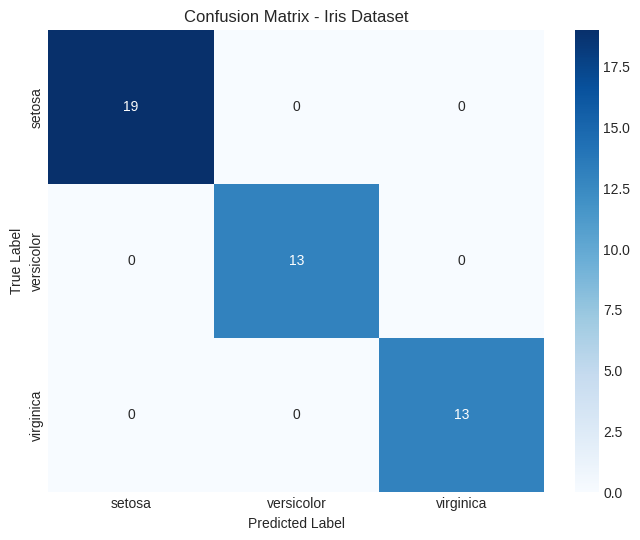

In [11]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split and scale
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

# Train KNN
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris_scaled, y_train_iris)

# Predictions
y_pred_iris = knn_iris.predict(X_test_iris_scaled)

# Evaluate
print(f"Iris Dataset - Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test_iris, y_pred_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Dataset')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 9. Visualizing KNN Prediction Process

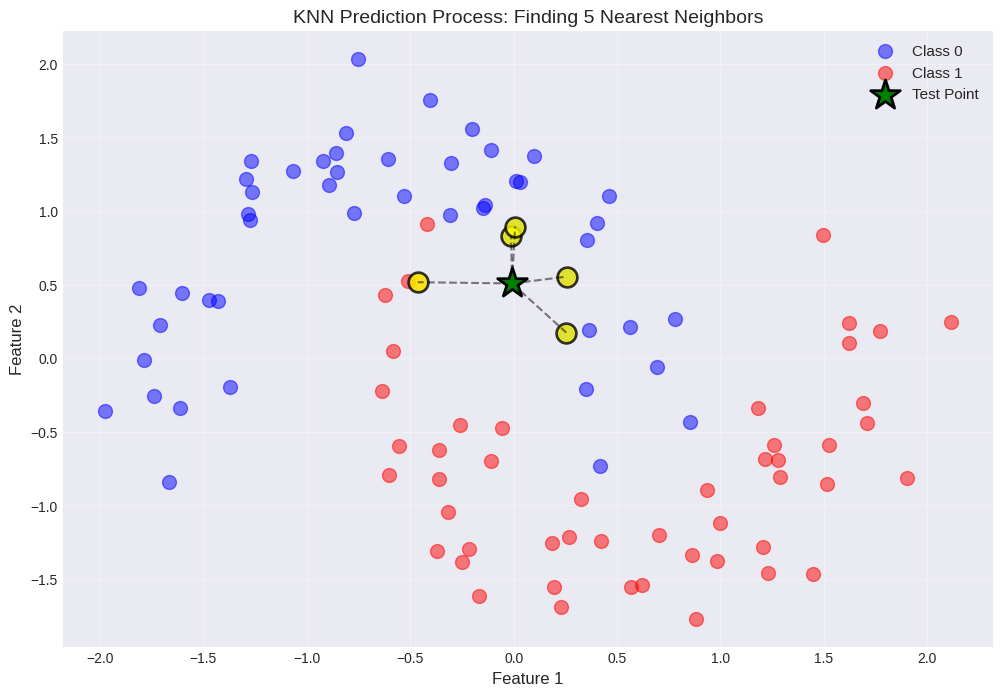

Predicted Class: 0
Class Probabilities: Class 0: 0.80, Class 1: 0.20


In [12]:
# Create a simpler dataset for visualization
X_simple, y_simple = make_moons(n_samples=100, noise=0.15, random_state=42)
scaler_simple = StandardScaler()
X_simple_scaled = scaler_simple.fit_transform(X_simple)

# Train KNN
knn_viz = KNeighborsClassifier(n_neighbors=5)
knn_viz.fit(X_simple_scaled, y_simple)

# Pick a test point
test_point = np.array([[0.5, 0.5]])
test_point_scaled = scaler_simple.transform(test_point)

# Find k nearest neighbors
distances, indices = knn_viz.kneighbors(test_point_scaled, n_neighbors=5)

# Visualize
plt.figure(figsize=(12, 8))
plt.scatter(X_simple_scaled[y_simple == 0][:, 0], X_simple_scaled[y_simple == 0][:, 1],
            c='blue', label='Class 0', alpha=0.5, s=100)
plt.scatter(X_simple_scaled[y_simple == 1][:, 0], X_simple_scaled[y_simple == 1][:, 1],
            c='red', label='Class 1', alpha=0.5, s=100)

# Plot test point
plt.scatter(test_point_scaled[0, 0], test_point_scaled[0, 1],
            c='green', marker='*', s=500, edgecolors='black',
            linewidth=2, label='Test Point', zorder=5)

# Plot nearest neighbors
for idx in indices[0]:
    plt.scatter(X_simple_scaled[idx, 0], X_simple_scaled[idx, 1],
                c='yellow', s=200, alpha=0.8, edgecolors='black', linewidth=2)
    plt.plot([test_point_scaled[0, 0], X_simple_scaled[idx, 0]],
             [test_point_scaled[0, 1], X_simple_scaled[idx, 1]],
             'k--', alpha=0.5, linewidth=1.5)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('KNN Prediction Process: Finding 5 Nearest Neighbors', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Show prediction
prediction = knn_viz.predict(test_point_scaled)
proba = knn_viz.predict_proba(test_point_scaled)
print(f"Predicted Class: {prediction[0]}")
print(f"Class Probabilities: Class 0: {proba[0][0]:.2f}, Class 1: {proba[0][1]:.2f}")

## 10. Summary and Key Takeaways

### Algorithm Characteristics:
- **Lazy Learning**: KNN doesn't build a model during training; it memorizes the training data
- **Non-parametric**: Makes no assumptions about the underlying data distribution
- **Instance-based**: Predictions are based on similarity to training examples

### Hyperparameters:
- **k (number of neighbors)**: Higher k = smoother decision boundary, lower variance but higher bias
- **Distance metric**: Euclidean works well for continuous features, Manhattan for high dimensions, Cosine for text/sparse data
- **Weighting**: Can weight neighbors by distance (closer neighbors have more influence)

### Advantages:
- Simple to understand and implement
- No training phase (fast model building)
- Naturally handles multi-class problems
- Can adapt to new training data easily

### Disadvantages:
- Slow prediction time (scales with training set size)
- Memory intensive (stores all training data)
- Sensitive to irrelevant features and scale
- Curse of dimensionality (performance degrades in high dimensions)

### Best Practices:
1. Always scale/normalize features
2. Use cross-validation to find optimal k
3. Consider dimensionality reduction for high-dimensional data
4. For large datasets, consider approximate nearest neighbor methods (ANN)
5. Remove or weight features appropriately

## 11. Performance Optimization Tips

For production systems with large datasets, consider:

1. **KD-Trees or Ball Trees**: Scikit-learn's KNN uses these for faster neighbor search
2. **Approximate Nearest Neighbors**: Libraries like FAISS, Annoy, or HNSW for massive scale
3. **Feature Selection**: Remove irrelevant features to reduce dimensionality
4. **Locality Sensitive Hashing (LSH)**: For very high-dimensional data
5. **GPU Acceleration**: Use RAPIDS cuML for GPU-accelerated KNN